In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import nltk
from string import punctuation
import re
from global_values import *


# 文本数据处理

In [7]:
train_data = pd.read_csv(data_dir+'train_split_Depression_AVEC2017.csv')
dev_data = pd.read_csv(data_dir+'dev_split_Depression_AVEC2017.csv')
test_data = pd.read_csv(data_dir+'full_test_split.csv')

In [8]:
test_data.rename(columns = {"PHQ_Binary":"PHQ8_Binary"},inplace=True)

In [9]:
print(train_data.columns,end='\n')
print(dev_data.columns,end='\n')
print(test_data.columns,end='\n')
labels = pd.concat([train_data[['Participant_ID','PHQ8_Binary']],dev_data[['Participant_ID','PHQ8_Binary']],\
           test_data[['Participant_ID','PHQ8_Binary']]],axis=0)
labels.sort_values(by="Participant_ID")
labels.head()

Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'],
      dtype='object')
Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'],
      dtype='object')
Index(['Participant_ID', 'PHQ8_Binary', 'PHQ_Score', 'Gender'], dtype='object')


,Participant_ID,PHQ8_Binary
0,303,0
1,304,0
2,305,0
3,310,0
4,312,0


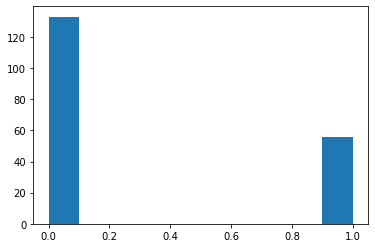

In [10]:
plt.hist(labels['PHQ8_Binary'])
plt.show()

In [11]:
text_files = [file for file in os.listdir(text_dir) if file.endswith('.csv')]
text_files[:5]
assert len(text_files)==189

In [12]:
text_files.sort()
PREFIX = [file[:3] for file in text_files]
text_files[:5]

['300_TRANSCRIPT.csv',
 '301_TRANSCRIPT.csv',
 '302_TRANSCRIPT.csv',
 '303_TRANSCRIPT.csv',
 '304_TRANSCRIPT.csv']

In [13]:
text_300 = pd.read_csv(text_dir+text_files[0],sep='\t')
text_300.head()

,start_time,stop_time,speaker,value
0,36.588,39.668,Ellie,hi i'm ellie thanks for coming in today
1,39.888,43.378,Ellie,i was created to talk to people in a safe and ...
2,43.728,48.498,Ellie,think of me as a friend i don't judge i can't ...
3,49.188,52.388,Ellie,i'm here to learn about people and would love ...
4,52.658,58.958,Ellie,i'll ask a few questions to get us started and...


In [14]:
". ".join(text_300[text_300['speaker']=="Participant"].value.tolist())

"good. atlanta georgia. um my parents are from here um. i love it. i like the weather. i like the opportunities. um. yes. um. it took a minute. somewhat easy. congestion. that's it. um i took up business and administration. uh yeah i am. here and there i'm on a break right now but i plan on going back in the uh next semester. uh probably to open up my own business. no. um no specific reason i just. don't travel a lot. i'm pretty local. once a year. can you be a little bit more specific. no answer. i like reading books i enjoy i enjoy cooking. um exercising is great. i'm i'm i'm pretty good at it. um. yeah. um probably about. two weeks ago. uh frustrated. um. i don't like bias. um i don't like um when someone says they're gonna do something and they don't. uh somewhat. friendship. i like to play sports i enjoy uh going out with friends and family. playing games. grandparents. parents. um yeah i mean they've always given me great advice. they've always kept it real. real close. i would s

In [15]:
with open(text_dir+'docs.txt','w') as f:
    for file in text_files:
        text = pd.read_csv(text_dir+file,sep='\t')
        if np.any(text.value.isnull()):
            text.value.fillna("",inplace=True)
        try:
            text = ". ".join(text[text['speaker']=="Participant"].value.tolist())
            f.write(text)
            f.write('\n')
        except:
            print(file)

In [4]:
with open(TEXT_DIR+"docs.txt",'r') as f:
    docs = "".join(f.readlines()).split('\n')
    docs = docs[:-1]
assert len(docs)==189

In [17]:
with open(text_dir+"labels.txt",'w') as f:
    for label in labels.PHQ8_Binary.tolist():
        f.write(str(label))
        f.write('\n')


In [5]:
with open(TEXT_DIR+"labels.txt",'r') as f:
    labels = "".join(f.readlines()).split('\n')
    labels = labels[:-1]
assert len(labels)==189

In [86]:
def Process_text(text):
    """预处理文本:
    - 分词
    - 去特殊符号
    """
    pattern = r"[!\"#$%&'()*+,-./:;<=>?@\[\]\\^_`{|}~]"
    text = re.sub(pattern,"",text)
    return text

In [87]:
with open(TEXT_DIR+'process_docs.txt','w') as f:
    for doc in docs:
        f.write(Process_text(doc))
        f.write('\n')

In [10]:
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from core.model.EmbeddingAverage import EmbedAvg
from collections import Counter
model = EmbedAvg(25000,100,1,0.5)

In [9]:
with open(TEXT_DIR+'process_docs.txt','r') as f:
    docs = "".join(f.readlines()).split('\n')
docs[0]

'good atlanta georgia um my parents are from here um i love it i like the weather i like the opportunities um yes um it took a minute somewhat easy congestion thats it um i took up business and administration uh yeah i am here and there im on a break right now but i plan on going back in the uh next semester uh probably to open up my own business no um no specific reason i just dont travel a lot im pretty local once a year can you be a little bit more specific no answer i like reading books i enjoy i enjoy cooking um exercising is great im im im pretty good at it um yeah um probably about two weeks ago uh frustrated um i dont like bias um i dont like um when someone says theyre gonna do something and they dont uh somewhat friendship i like to play sports i enjoy uh going out with friends and family playing games grandparents parents um yeah i mean theyve always given me great advice theyve always kept it real real close i would say going to college right after high school well i wouldv

In [12]:
words = [sentence.split() for sentence in docs]


In [16]:
allwords = Counter(" ".join(docs).split(' '))
len(allwords)

8611

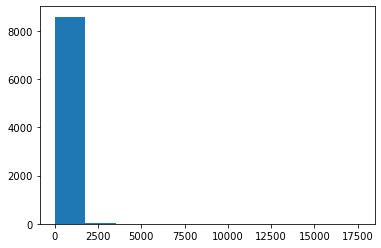

In [38]:
plt.hist(allwords.values())
plt.show()

In [50]:
allwords.most_common(8000)[-10:]

[('pitfalls', 1),
 ('drain', 1),
 ('awakeness', 1),
 ('hoover', 1),
 ('dam', 1),
 ('breathtaking', 1),
 ('stitch', 1),
 ('workload', 1),
 ('vocational', 1),
 ('des', 1)]

In [143]:
from core.model.WordAttention import WordAttention
from core.model.biLSTM_attention import BiLSTM_ATT
import torch.nn as nn
import torch
import torch.optim as optim
import torch.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, PackedSequence
from torch.utils.data import DataLoader,TensorDataset
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
import matplotlib.pyplot as plt

sentences = torch.randint(0,20,(100,10)) # 100*10
labels = torch.randint(0,2,(100,)) #100*1
words_per_sentence = torch.randint(1,11,(100,))
#model = WordAttention(voc_size=20,emb_size=12,rnn_size=10,rnn_layers=2,att_size=8,bidirection=True,dropout=0.5)
model = BiLSTM_ATT(voc_size=20,emb_size=12,rnn_size=10,rnn_layers=2,att_size=8,bidirection=True,dropout=0.5)
device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.BCELoss()
optimer = optim.Adam(model.parameters(),lr=0.01)
model.to(device)

BiLSTM_ATT(
  (embedding): Embedding(20, 12)
  (lstm): LSTM(12, 10, num_layers=2, batch_first=True, bidirectional=True)
  (att): Linear(in_features=20, out_features=8, bias=True)
  (word_context_vector): Linear(in_features=8, out_features=1, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [144]:
temp_sentences = sentences
temp_labels = labels
temp_words = words_per_sentence

In [145]:
dataset = TensorDataset(sentences,words_per_sentence,labels)
data = DataLoader(dataset,batch_size=64,shuffle=True)
sentences.shape
labels.shape
words_per_sentence.shape

torch.Size([100])

In [146]:
def acc_metrics(pre,y,threshold):
    pre = [0 if num<threshold else 1 for num in pre]
    recall = recall_score(y,pre)
    precision = precision_score(y,pre)
    f1 = f1_score(y,pre)
    accuracy = accuracy_score(y,pre)
    metrics = [recall,precision,f1,accuracy]
    return [round(metric,3) for metric in metrics] 
    

In [147]:
for epoch in range(100):
    Loss = 0
    for sentences,words_per_sentence,labels in data:
        model.train()
        sentences = sentences.to(device)
        words_per_sentence = words_per_sentence.to(device)
        labels = labels.to(device)
        pre = model(sentences,words_per_sentence)
        print(acc_metrics(pre.squeeze(),labels.float(),threshold=0.5))
        loss = criterion(pre.squeeze(),labels.float())
        optimer.zero_grad()
        loss.backward()
        optimer.step()
        Loss+=loss.item()
    print(Loss)

[0.0, 0.0, 0.0, 0.438]
[0.136, 0.429, 0.207, 0.361]
1.4072996377944946
[0.405, 0.625, 0.492, 0.516]
[0.7, 0.609, 0.651, 0.583]
1.3855034708976746
[0.812, 0.481, 0.605, 0.469]
[0.92, 0.697, 0.793, 0.667]
1.3695263862609863
[1.0, 0.548, 0.708, 0.562]
[0.957, 0.629, 0.759, 0.611]
1.3516038656234741
[0.974, 0.613, 0.752, 0.609]
[1.0, 0.5, 0.667, 0.5]
1.3476160764694214
[1.0, 0.594, 0.745, 0.594]
[1.0, 0.543, 0.704, 0.556]
1.3168478608131409
[1.0, 0.562, 0.72, 0.562]
[1.0, 0.618, 0.764, 0.639]
1.2874531149864197
[1.0, 0.562, 0.72, 0.562]
[1.0, 0.583, 0.737, 0.583]
1.2770016193389893
[0.973, 0.632, 0.766, 0.656]
[0.95, 0.633, 0.76, 0.667]
1.2569674253463745
[0.892, 0.673, 0.767, 0.688]
[0.9, 0.643, 0.75, 0.667]
1.2552590370178223
[0.833, 0.732, 0.779, 0.734]
[0.81, 0.708, 0.756, 0.694]
1.1955742835998535
[0.784, 0.725, 0.753, 0.703]
[0.8, 0.727, 0.762, 0.722]
1.1445006132125854
[0.824, 0.8, 0.812, 0.797]
[0.826, 0.792, 0.809, 0.75]
1.0925728678703308
[0.795, 0.738, 0.765, 0.703]
[0.889, 0.8,

In [148]:
temp_labels.numpy().tolist()

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0]

In [149]:
model.eval()
pre = model(temp_sentences,temp_words).squeeze()
pre = [1 if num>0.5 else 0 for num in pre]
pre

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0]

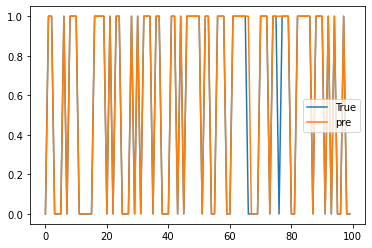

In [150]:
plt.figure(figsize=(6, 6.5))

plt.plot(range(100),temp_labels,label ="True")
plt.plot(range(100),pre,label ="pre")
plt.legend()
plt.show()